In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np


In [7]:
from google.colab import files

# This will prompt you to upload the zip file from your local machine
uploaded =files.upload()

Saving Dataset Brain Tumor.zip to Dataset Brain Tumor.zip


In [8]:
import zipfile
import os

# Specify the name of the uploaded zip file
zip_file_name = 'Dataset Brain Tumor.zip'  # Change this if your zip file name is different

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('Dataset Brain Tumor')

# Verify the contents of the unzipped directory
os.listdir('Dataset Brain Tumor')

['Dataset Brain Tumor']

In [9]:
# Set paths
train_dir = '/content/Dataset Brain Tumor/Dataset Brain Tumor/Training Dataset'
test_dir = '/content/Dataset Brain Tumor/Dataset Brain Tumor/Testing Dataset'

# Define image size and batch size
image_size = (240, 240)
batch_size = 32

# Training data generator with augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Testing data generator without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 5708 images belonging to 4 classes.
Found 1273 images belonging to 4 classes.


In [10]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully Connected Layer
    model.add(layers.Dense(128, activation='relu'))

    # Output Layer
    model.add(layers.Dense(4, activation='softmax'))

    return model

# Input shape
input_shape = (240, 240, 3)  # Assuming RGB images

# Create the model
model = create_cnn_model(input_shape)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 236, 236, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 118, 118, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 114, 114, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 57, 57, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 53, 53, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,334,852 (43.24 MB)

 Trainable params: 11,334,852 (43.24 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_generator,
    epochs=20,  # Adjust based on your needs
    validation_data=test_generator
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 474ms/step - accuracy: 0.4331 - loss: 1.2289 - val_accuracy: 0.5161 - val_loss: 1.2299
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 125s 427ms/step - accuracy: 0.6492 - loss: 0.8558 - val_accuracy: 0.6206 - val_loss: 1.0130
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 425ms/step - accuracy: 0.7001 - loss: 0.7537 - val_accuracy: 0.7376 - val_loss: 0.6222
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 434ms/step - accuracy: 0.7271 - loss: 0.6828 - val_accuracy: 0.7541 - val_loss: 0.6416
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 427ms/step - accuracy: 0.7757 - loss: 0.5794 - val_accuracy: 0.7392 - val_loss: 0.6850
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 431ms/step - accuracy: 0.7621 - loss: 0.5852 - val_accuracy: 0.7486 - val_loss: 0.5819
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 419ms/step - accuracy: 0.7860 - loss: 0.5366 - val_accuracy: 0.7282 - val_loss: 0.7074
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 420ms/step - accuracy: 0.7975 - loss: 0.5222 - va

In [12]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Predict the probabilities for test data
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# AUC Score
auc = roc_auc_score(y_true, y_pred, multi_class='ovr')
print(f'AUC Score: {auc:.4f}')


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.7704 - loss: 0.4664
Test Accuracy: 0.8342
Test Loss: 0.3675
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.86      0.71      0.77       262
  meningioma       0.67      0.70      0.69       306
     notumor       0.89      0.97      0.93       405
   pituitary       0.92      0.90      0.91       300

    accuracy                           0.83      1273
   macro avg       0.83      0.82      0.82      1273
weighted avg       0.84      0.83      0.83      1273

AUC Score: 0.9662


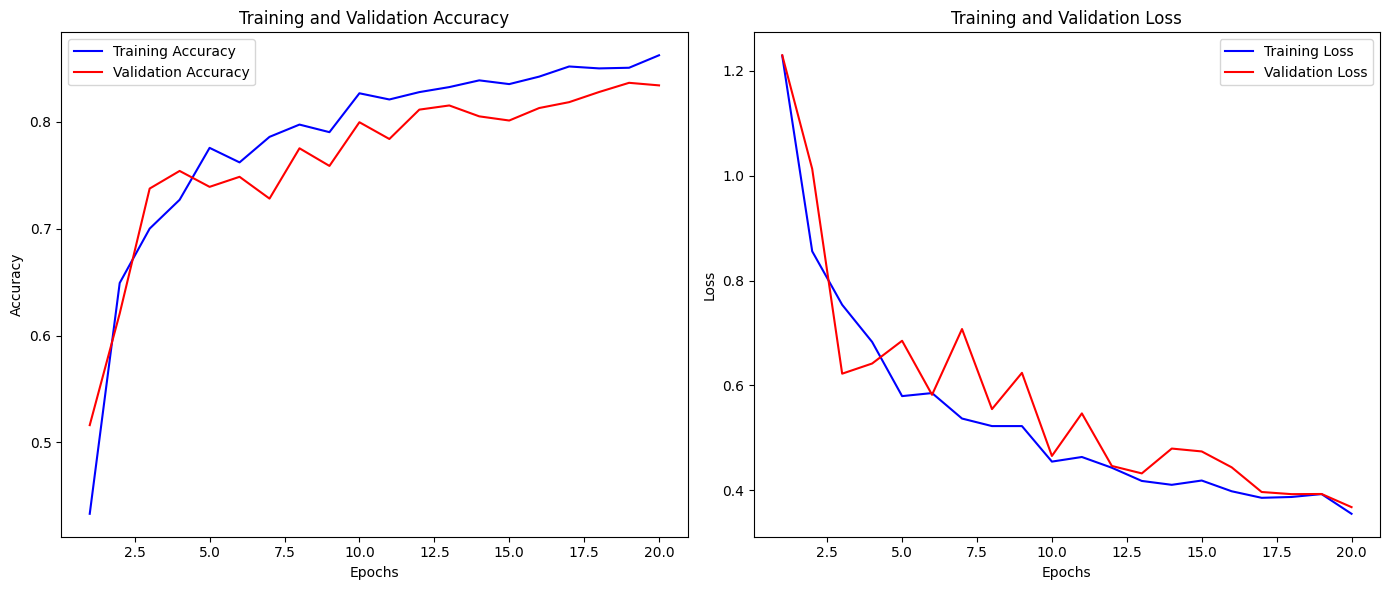

In [13]:
import matplotlib.pyplot as plt

# Epochs
epochs = range(1, 21)  # Number of epochs in your training

# Training and validation accuracy and loss values
train_accuracy = [0.4331, 0.6492, 0.7001, 0.7271, 0.7757, 0.7621, 0.7860, 0.7975, 0.7904, 0.8268, 0.8210, 0.8279, 0.8326, 0.8389, 0.8354, 0.8424, 0.8519, 0.8501, 0.8507, 0.8624]
val_accuracy = [0.5161, 0.6206, 0.7376, 0.7541, 0.7392, 0.7486, 0.7282, 0.7753, 0.7588, 0.7997, 0.7840, 0.8115, 0.8154, 0.8052, 0.8013, 0.8130, 0.8185, 0.8280, 0.8366, 0.8342]

train_loss = [1.2289, 0.8558, 0.7537, 0.6828, 0.5794, 0.5852, 0.5366, 0.5222, 0.5222, 0.4544, 0.4632, 0.4427, 0.4175, 0.4101, 0.4183, 0.3978, 0.3853, 0.3869, 0.3924, 0.3548]
val_loss = [1.2299, 1.0130, 0.6222, 0.6416, 0.6850, 0.5819, 0.7074, 0.5546, 0.6238, 0.4652, 0.5464, 0.4461, 0.4319, 0.4793, 0.4738, 0.4435, 0.3964, 0.3923, 0.3926, 0.3675]

# Plot Accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
